In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [2]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
import datetime as dt

In [3]:
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
text_0=widgets.HTML(value="<h1>Welcome to COVID-19 Indian Economy Dashboard</h1>")
vbox_text=widgets.VBox([text_0])

In [5]:
page=widgets.HBox([vbox_text])
display(page)

In [6]:
gdp=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/India_GDP_stream.csv")

In [7]:
gdp=gdp.fillna(0)

### Line Plot depicting the GDP of India from 2015 to 2020

In [8]:
trace1 = go.Scatter(
    x = gdp["States"],
    y = gdp["2011-12"],
    mode = 'lines+markers',
    name = '2015-16',
    marker = dict(color = 'rgba(255, 51, 51, 0.5)'),
    text = gdp.States)

trace2 = go.Scatter(
    x = gdp["States"],
    y = gdp["2012-13"],
    mode = 'lines+markers',
    name = '2016-17',
    marker = dict(color = 'rgba(51, 102, 255, 0.5)'),
    text = gdp.States)

trace3 = go.Scatter(
    x = gdp["States"],
    y = gdp["2013-14"],
    mode = 'lines+markers',
    name = '2017-18',
    marker = dict(color = 'rgba(51, 51, 255, 0.5)'),
    text = gdp.States)

trace4 = go.Scatter(
    x = gdp["States"],
    y = gdp["2014-15"],
    mode = 'lines+markers',
    name = '2018-19',
    marker = dict(color = 'rgba(51, 255, 51, 0.5)'),
    text = gdp.States)

trace5 = go.Scatter(
    x = gdp["States"],
    y = gdp["2015-16"],
    mode = 'lines+markers',
    name = '2019-20',
    marker = dict(color = 'rgba(255, 255, 51, 0.5)'),
    text = gdp.States)

trace6 = go.Scatter(
    x = gdp["States"],
    y = gdp["2016-17"],
    mode = 'lines+markers',
    name = '2020-21',
    marker = dict(color = 'rgba(51, 102, 51, 0.5)'),
    text = gdp.States)

layout = dict(title = 'GDP Statewise for years 2015-20',
             xaxis= dict(zeroline= False)
             )

data = [trace1, trace2, trace3, trace4, trace5, trace6]
fig = dict(data = data, layout = layout)

iplot(fig)

In [9]:
fp=r'C:/Users/Prijita/Downloads/Assign5/india-polygon.shp'
data=gpd.read_file(fp)

In [10]:
dat=data.drop(columns=['id'])

In [11]:
dat.sort_values(by=['st_nm'],inplace=True)

In [12]:
from geopandas import GeoDataFrame
merged2=gdp.set_index('States').join(dat.set_index('st_nm'))

In [13]:
merged3=GeoDataFrame(merged2)

### The below graph shows the GDP of 2020-21

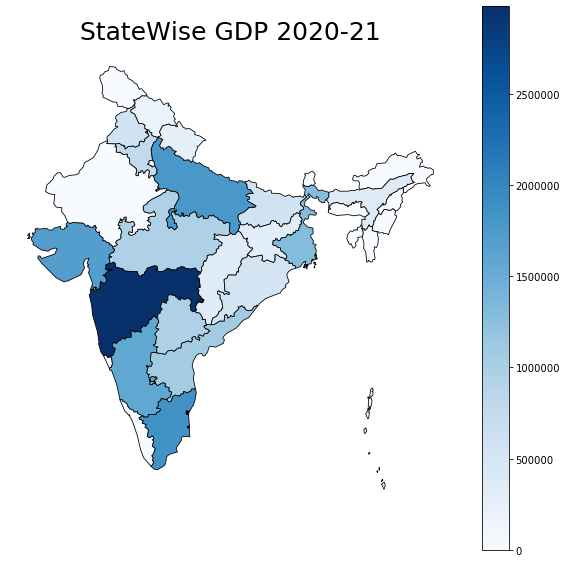

In [14]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise GDP 2020-21',fontdict={'fontsize':'25','fontweight':'10'})
variable='2019-20'
merged3.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [15]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=gdp['States'],
    z=gdp['2019-20'],

    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "2020-21"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=500000,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise GDP of 2020-21",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

In [16]:
gdp1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/gdp_box.csv")
gdp1=gdp1.fillna(0)

### The below graph gives the boxPlot of the GDP of India from 2011-2020

In [17]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

iplot(gdp1.iplot(asFigure=True, kind='box',title='Visualize the GDP for last 10 years', dimensions=(800,500)))

### The below Violin Plot gives the GDP information of India

In [18]:
plot = go.Figure(data=[go.Violin(
    y = gdp1["2011"],
    name="2011"),
                       go.Violin(
    y = gdp1["2012"],
    name="2012"),
                       go.Violin(
    y = gdp1["2013"],
    name="2013"),
                       go.Violin(
    y = gdp1["2014"],
    name="2014"),
                       go.Violin(
    y = gdp1["2015"],
    name="2015"),
                       go.Violin(
    y = gdp1["2016"],
    name="2016"),
                       go.Violin(
    y = gdp1["2017"],
    name="2017"),
                       go.Violin(
    y = gdp1["2018"],
    name="2018"),
                       go.Violin(
    y = gdp1["2019"],
    name="2019"),
                       go.Violin(
    y = gdp1["2020"],
    name="2020")
])
plot.update_layout(title = "Visualize the GDP yearwise for 10 years")                   
plot.show()

In [19]:
exp=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Vaccine_Statewise.csv")

In [20]:
exp.sort_values(by=['State'],inplace=True)

In [21]:
exp=exp.fillna(0)

In [22]:
merged6=exp.set_index('State').join(dat.set_index('st_nm'))

In [23]:
merged7=GeoDataFrame(merged6)

### The Below two graphs give total vaccine expenditure statewise

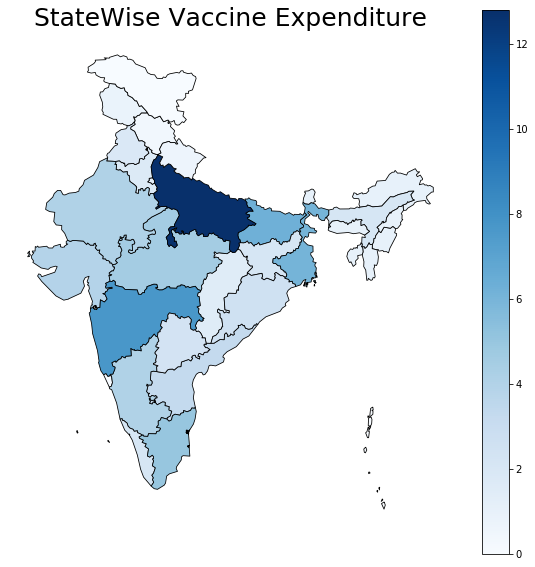

In [24]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Vaccine Expenditure',fontdict={'fontsize':'25','fontweight':'10'})
variable='Cost_Vaccine'
merged7.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [25]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=exp['State'],
    z=exp['Cost_Vaccine'],

    autocolorscale=False,
    colorscale='Greens',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Vaccine cost"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=1.5,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Vaccine Expenditure",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

In [26]:
heal=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Healthcare.csv")

In [27]:
merged8=heal.set_index('States').join(dat.set_index('st_nm'))

In [28]:
merged9=GeoDataFrame(merged8)

### The below two graphs gives the statewise healthcare expenditure in the year 2020-21

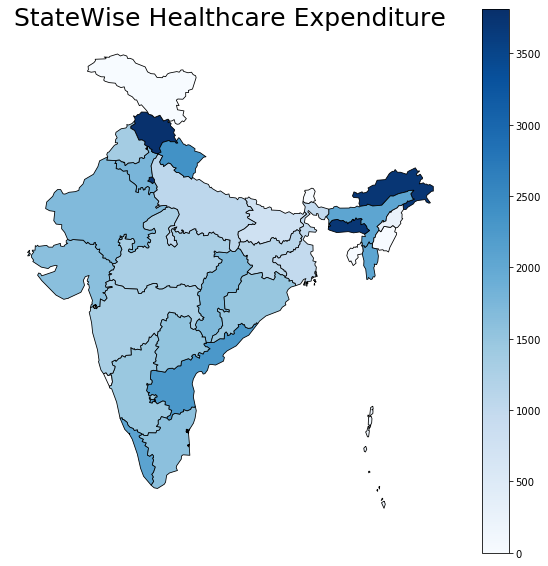

In [29]:
fig,ax=plt.subplots(1,figsize=(10,10))
ax.axis('off')
ax.set_title('StateWise Healthcare Expenditure',fontdict={'fontsize':'25','fontweight':'10'})
variable='Per_Capita'
merged9.plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [30]:
fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=heal['States'],
    z=heal['Per_Capita'],

    autocolorscale=False,
    colorscale='Greens',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "Healthcare"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=500,

        xanchor='right',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="StateWise Healthcare Expenditure",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

In [31]:
fis=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/Fiscal.csv")

### The below graph gives the fiscal deficit rate i.e., the condition when the expenditure of the government exceeds its revenue in a year 

In [32]:
fis1=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/fiscal_area.csv")
import plotly
plotly.offline.init_notebook_mode(connected=True)
trace1 = go.Bar(x=fis1["Rate"],y=fis1["2017"],name='2017')
trace2 = go.Bar(x=fis1["Rate"],y=fis1["2018"],name='2018')
trace3 = go.Bar(x=fis1["Rate"],y=fis1["2019"],name='2019')
trace4 = go.Bar(x=fis1["Rate"],y=fis1["2020"],name='2020')

data = [trace1, trace2, trace3, trace4]
plotly.offline.iplot({"data": data,"layout": go.Layout(title="Fiscal Deficit from 2017-2020",height=500,)
})

In [33]:
com=pd.read_csv("C:/Users/Prijita/Downloads/Assign5/expenditure_lakh.csv")

### The below table gives the different category companies under MSME of government

In [34]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(com.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=com.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title="Expenditure of the different government companies under MSME")
fig.show()